# Descrição do Projeto

**Análise Estatística de Negócio**

Objetivo: Aumentar a receita de uma grande loja online através da análise de hipóteses propostas pelo departamento de marketing.

**Etapas do projeto:**

Importar as bibliotecas: Pandas, Matplotlib, Statistics, Scipy, Math, statistics e datetime.

Explorando dados: Vamos importar os dados sobre a loja online e as hipóteses, como informações de conversão, vendas, número de usuários e visitantes. 

Limpeza de dados: Identificar se há dados faltantes, outliers ou erros em nossos dataframes, e corrigi-los se necessário.

Priorizando hipóteses: Juntamente com o departamento de marketing, temos uma lista de hipóteses compiladas que podem ajudar a aumentar a receita.

Teste A/B: Definir um grupo A e um grupo B, aplicar as mudanças propostas na hipótese apenas no grupo B e acompanhar a conversão e a receita de ambos os grupos.

Análise de resultados: Será calculado a significância estatística da diferença na conversão entre os grupos usando testes como t-test ou Mann-Whitney U Test. Verificar se há uma diferença significativa na conversão e na receita.

Visualização de dados: Utilizando a biblioteca Matplotlib para plotar gráficos de linhas, gráficos de barras ou gráficos de dispersão para visualizar as mudanças na conversão e na receita.

Conclusão: Analisar os resultados, verificar qual das hipóteses teve o maior impacto na conversão e na receita e priorizar as hipóteses que devem ser implementadas na loja online.


## Importando Dados e Bibliotecas


In [146]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import statistics
import datetime as dt

In [147]:
import pandas as pd

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

orders = pd.read_csv('/datasets/orders_us.csv')

visits = pd.read_csv('/datasets/visits_us.csv')

### Explorando os Dados

In [148]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [149]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [150]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [151]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [152]:
hypotheses.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [153]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [154]:
orders.tail()

,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


In [155]:
orders.sample(15)

,transactionId,visitorId,date,revenue,group
996,1998112401,1900893596,2019-08-31,5.5,A
948,3462663151,2158146269,2019-08-21,70.9,A
94,252633006,457167155,2019-08-22,95.8,B
321,1775445570,3118528100,2019-08-19,20.8,A
528,1543948528,492739583,2019-08-19,15.5,A
501,50573571,152397976,2019-08-04,10.5,B
1075,4261512099,4178309188,2019-08-12,50.8,B
273,1769257333,2278620397,2019-08-23,525.6,B
899,2159858322,2283224496,2019-08-27,35.5,A
521,641338041,623318263,2019-08-26,165.6,B


In [156]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Não há valores ausentes no dataframe 'orders'

In [157]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [158]:
visits.tail()

,date,group,visits
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [159]:
visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

Sem dados ausentes em 'visits'

In [160]:
visits.sample(15)

,date,group,visits
16,2019-08-17,A,412
30,2019-08-31,A,699
37,2019-08-07,B,709
3,2019-08-04,A,717
14,2019-08-15,A,628
43,2019-08-13,B,769
51,2019-08-21,B,656
4,2019-08-05,A,756
12,2019-08-13,A,748
20,2019-08-21,A,646


In [161]:
duplicates_orders = orders.duplicated().sum()
print(f"Número de duplicatas no DataFrame 'orders': {duplicates_orders}")

duplicates_visits = visits.duplicated().sum()
print(f"Número de duplicatas no DataFrame 'visits': {duplicates_visits}")

Número de duplicatas no DataFrame 'orders': 0
Número de duplicatas no DataFrame 'visits': 0


In [162]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Há uma desigualdade relativamente considerável entre os grupos que podem causar algum desiquilíbrio na interpretação dos dados.

In [163]:
visits['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

### Alterando os tipos dos dados

In [164]:
orders['date']=pd.to_datetime(orders['date'], format='%Y-%m-%d')
visits['date']=pd.to_datetime(visits['date'], format='%Y-%m-%d')

## Parte 1: Priorizando Hipóteses 

O dataframe 'hypotheses' contém 9 hipóteses propostas pelo setor de Marketing para o aumento de receita, vamos aplicar o framework 'ICE' e 'RICE' para priorizar hipóteses e encontrar as hipóteses que precisam ser priorizadas. 

In [165]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


### ICE 

In [166]:
hypotheses['ICE'] = (hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']

print(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


**Resultados do Framework ICE**

**Hipótese 9: Launch a promotion that gives users discounts:** Tem o maior valor de ICE (16.2), isso sugere que essa hipótese possui um grande potencial, dada a combinação de alto impacto e confiança, com um esforço relativamente menor.

**Hipótese 1: Add two new channels for attracting traffic:** Apresenta o segundo maior valor de ICE (13.33). Embora tenha um esforço um pouco maior que a hipótese com o maior ICE, seu potencial de impacto e confiança ainda o coloca em alta prioridade.

**Hipótese 8: Add a subscription form to all the main pages:** Possui um valor de ICE considerável (11.2), indicando um bom potencial de impacto em relação ao esforço necessário.

### RICE

In [167]:
hypotheses['RICE'] = (hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']
print(hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


**Resultados do framework RICE:**

**Hipótese 8: Add a subscription form to all the main pages:** Tem o maior valor de RICE (112.0). Isso é devido ao alto potencial de impacto em conjunto com um amplo alcance. Mesmo com um esforço moderado, seu alcance elevado o coloca em prioridade.

**Hipótese 3: Add product recommendation blocks to the store:** Com um RICE de 56.0, esta hipótese possui um potencial considerável de impacto e um alcance significativo.

**Hipótese 1: Add two new channels for attracting traffic:** Apresenta um RICE de 40.0. Embora tenha um impacto e confiança elevados, seu alcance pode ser menor em comparação com outras hipóteses.

Recomendo a implementação da Hipótese 8, pois tem um alto de impacto e um grande potencial para o aumento da receita, acredito que essa hipótese trará resultados significativos. 

## Parte 2: Análise  Teste A/B

### Receita Acumulada por grupo

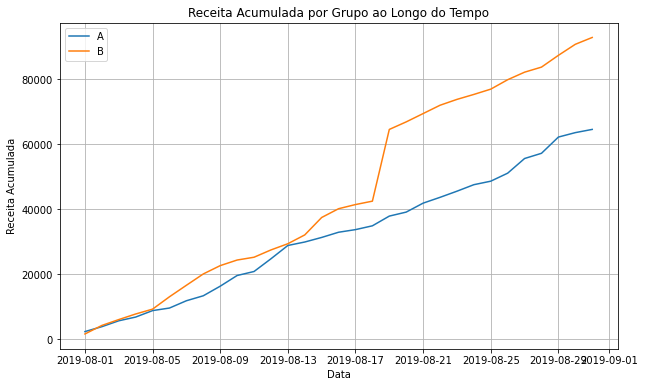

In [168]:
grouped_orders = orders.groupby(['date', 'group']).agg({'revenue': 'sum'}).groupby('group').cumsum().reset_index()
grouped_orders.drop_duplicates()

plt.figure(figsize=(10, 6))

for group, data in grouped_orders.groupby('group'):
    plt.plot(data['date'], data['revenue'], label=group)

plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.title('Receita Acumulada por Grupo ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()

O Grupo B tem uma receita acumulado maior e talvez isso seja por conta da quantidade superior de dados no grupo B. 

In [169]:
alpha = 0.05

A = orders[orders['group'] == 'A']
B = orders[orders['group'] == 'B']

p1 = A['revenue'].sum() / A['visitorId'].count()
p2 = B['revenue'].sum() / B['visitorId'].count()

pv1 = A['visitorId'].count()
pv2 = B['visitorId'].count()

p_combined = (p1 + p2) / (pv1 + pv2)

difference = p1 - p2

z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/pv1 + 1/pv2))

distr = st.norm(0,1)

p_value = (1 - distr.cdf(abs(z_value))) * 2 

print('p-value: ', p_value)

if (p_value < alpha):
    print("Rejeitando a hipótese nula: há uma diferença significativa entre as proporções")
else:
    print("Falha ao rejeitar a hipótese nula: não há motivo para considerar as proporções diferentes")

p-value:  0.0
Rejeitando a hipótese nula: há uma diferença significativa entre as proporções


### Tamanho médio acumulado por Grupo:

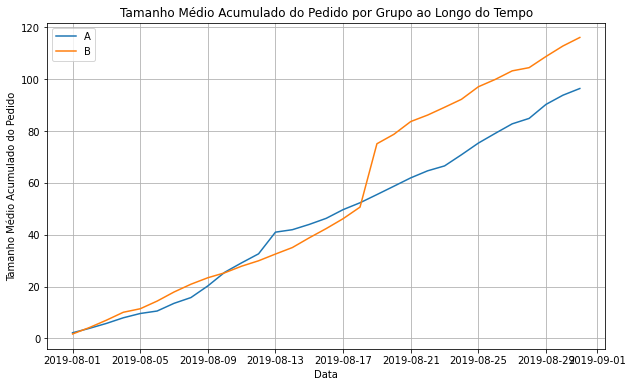

In [170]:
orders['avg_order_size'] = orders['revenue'] / orders.groupby('date')['transactionId'].transform('count')

grouped_orders = orders.groupby(['date', 'group']).agg({'avg_order_size': 'mean'}).groupby('group').cumsum().reset_index()

plt.figure(figsize=(10, 6))

for group, data in grouped_orders.groupby('group'):
    plt.plot(data['date'], data['avg_order_size'], label=group)

plt.xlabel('Data')
plt.ylabel('Tamanho Médio Acumulado do Pedido')
plt.title('Tamanho Médio Acumulado do Pedido por Grupo ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()

Podemos observar que pelo tamanho médio, vemos que em um curto período o Grupo A teve um desempenho melhor porém na grande parte o Grupo B teve o acumulado médio superior. 

### Diferença relativa entre o grupo A e B: 

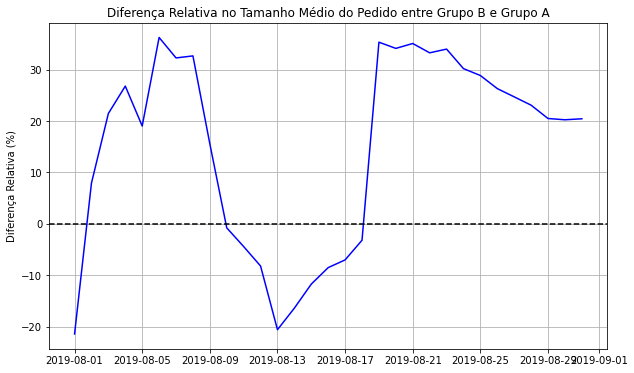

In [171]:
orders['avg_order_size'] = orders['revenue'] / orders.groupby('date')['transactionId'].transform('count')

grouped_orders = orders.groupby(['date', 'group']).agg({'avg_order_size': 'mean'}).groupby('group').cumsum().reset_index()

pivot_orders = grouped_orders.pivot(index='date', columns='group', values='avg_order_size').reset_index()
pivot_orders['Difference'] = (pivot_orders['B'] - pivot_orders['A']) / pivot_orders['A'] * 100

plt.figure(figsize=(10, 6))

plt.plot(pivot_orders['date'], pivot_orders['Difference'], color='blue')

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('')
plt.ylabel('Diferença Relativa (%)')
plt.title('Diferença Relativa no Tamanho Médio do Pedido entre Grupo B e Grupo A')
plt.grid(True)
plt.show()

Podemos notar que houve uma mudança no desempenho relativo dos grupos ao longo do tempo, indicando que o grupo B aumentou seu tamanho médio acumulado de pedido e superou o grupo A a partir de um determinado ponto, mantendo essa vantagem durante a maior parte do período analisado. 

### Taxa de Conversão Diária 

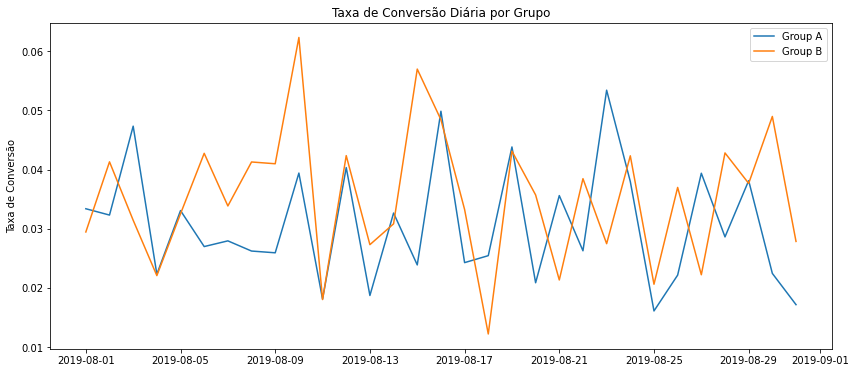

In [172]:
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

orders_count = orders.groupby(['date', 'group'])['transactionId'].count().reset_index()
orders_count = orders_count.rename(columns={'transactionId': 'orders'})

visits_count = visits.groupby(['date', 'group'])['visits'].sum().reset_index()
merged_data = pd.merge(orders_count, visits_count, on=['date', 'group'])
merged_data['conversion_rate'] = merged_data['orders'] / merged_data['visits']

group_A = merged_data[merged_data['group'] == 'A']
group_B = merged_data[merged_data['group'] == 'B']

plt.figure(figsize=(14, 6))

plt.plot(group_A['date'], group_A['conversion_rate'], label='Group A')
plt.plot(group_B['date'], group_B['conversion_rate'], label='Group B')

plt.xlabel('')
plt.ylabel('Taxa de Conversão')
plt.title('Taxa de Conversão Diária por Grupo')
plt.legend()
plt.grid(False)
plt.show()

### Taxa de Conversão ao longo do tempo:

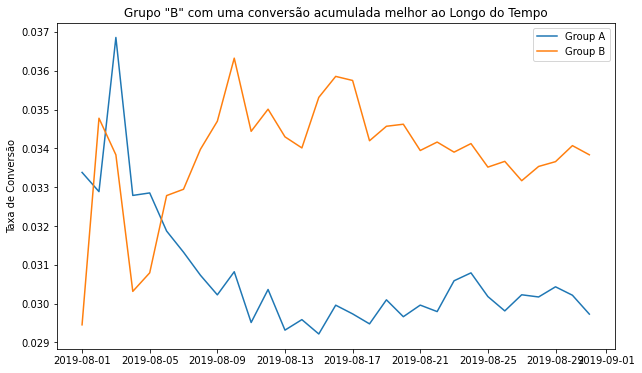

In [173]:
orders_cumsum = orders.groupby(['date', 'group'])['transactionId'].count().groupby(level=1).cumsum().reset_index()
orders_cumsum = orders_cumsum.rename(columns={'transactionId': 'orders_cumulative'})

visits_cumsum = visits.groupby(['date', 'group'])['visits'].sum().groupby(level=1).cumsum().reset_index()
visits_cumsum = visits_cumsum.rename(columns={'visits': 'visits_cumulative'})

merged_data_cumulative = pd.merge(orders_cumsum, visits_cumsum, on=['date', 'group'])
merged_data_cumulative['conversion_rate_cumulative'] = merged_data_cumulative['orders_cumulative'] / merged_data_cumulative['visits_cumulative']

group_A_cumulative = merged_data_cumulative[merged_data_cumulative['group'] == 'A']
group_B_cumulative = merged_data_cumulative[merged_data_cumulative['group'] == 'B']

plt.figure(figsize=(10, 6))

plt.plot(group_A_cumulative['date'], group_A_cumulative['conversion_rate_cumulative'], label='Group A')
plt.plot(group_B_cumulative['date'], group_B_cumulative['conversion_rate_cumulative'], label='Group B')

plt.xlabel('')
plt.ylabel('Taxa de Conversão')
plt.title('Grupo "B" com uma conversão acumulada melhor ao Longo do Tempo')
plt.legend()
plt.grid(False)
plt.show()

No diário a diferença não fica tão clara como no acumulado ao longo do tempo onde podemos notar o aumento significativo que houve na conversão do Grupo B. 

### Pedidos por Usuário:

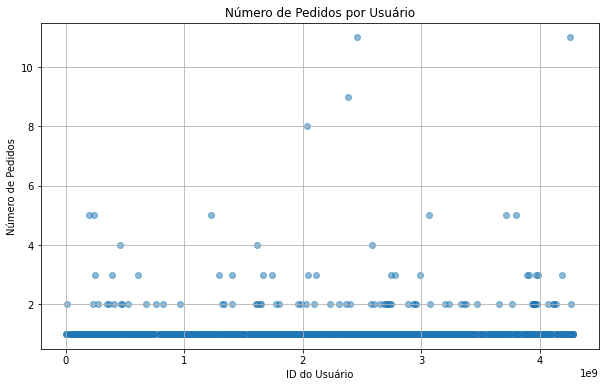

In [174]:
orders_per_user = orders.groupby('visitorId')['transactionId'].count().reset_index()
orders_per_user.columns = ['visitorId', 'num_orders']

plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user['visitorId'], orders_per_user['num_orders'], alpha=0.5)
plt.title('Número de Pedidos por Usuário')
plt.xlabel('ID do Usuário')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

Podemos observar que grande parte dos clientes realizaram 1 a 3 pedidos durante o período observado, mas temos clients que realizaram mais pedido, alguns realizaram mais de 8 pedidos durante o período. 

### Número de Pedidos por Usuário: Definindo Anomalias

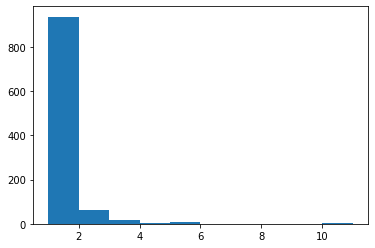

In [175]:
plt.hist(orders_per_user['num_orders']);


In [176]:
print(np.percentile(orders_per_user['num_orders'], [90, 95, 99])) 

[1. 2. 4.]


95% dos usuários realizaram até 2 pedidos no mês e somente 1% realizou 4 ou mais pedidos durante o período. Podemos concluir que 4 ou mais pedidos é algo atípico. 

### Valores dos Pedidos:

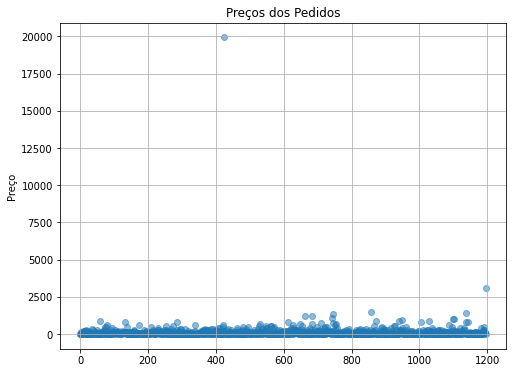

In [177]:
plt.figure(figsize=(8, 6))

plt.scatter(range(len(orders['revenue'])), orders['revenue'], alpha=0.5)
plt.title('Preços dos Pedidos')
plt.xlabel('')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

Grande parte dos pedidos tem valores abaixo de 2500 e há somente dois pedidos acima de 2500. 

### Valores atípicos de Pedidos:

In [178]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[282.48  435.54  900.904]


Valores acima do percentil 99 (900.904) são extremamente atípicos e representam os 1% mais altos dos valores de receita, esses valores são menos comuns de ocorrerem e podem ser considerados como atípicos. Entre os percentis 95 e 99 (435.54 - 900.904) também são relativamente atípicos, mas não tão extremos quanto os acima do percentil 99%.

### Teste de Normalidade

In [179]:
revenue = orders['revenue']

alpha = .05

results = st.shapiro(revenue)
p_value = results[1]

print("Estatística do teste de Shapiro-Wilk:", results)
if (p_value < alpha):
    print("Hipótese nula rejeitada: a distribuição não é normal")
else:
    print("Falha ao rejeitar a hipótese nula: a distribuição parece ser normal")

Estatística do teste de Shapiro-Wilk: ShapiroResult(statistic=0.10341775417327881, pvalue=0.0)
Hipótese nula rejeitada: a distribuição não é normal


### Significância estatística da conversão dos dados brutos

In [180]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np

orders.info()

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transactionId   1197 non-null   int64         
 1   visitorId       1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
 5   avg_order_size  1197 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 56.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [181]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.017
0.138


**Resultado do teste de Mann-Whitney U:** O valor-p encontrado (0.017) é menor que o nível de significância comum de 0.05. Portanto, rejeitamos a hipótese nula de que não há diferença entre os grupos. Isso sugere que existe uma diferença estatisticamente significativa entre os grupos A e B em relação ao número de pedidos por usuário.

**Diferença relativa entre os grupos:** A diferença relativa mostra que a média de pedidos por usuário no grupo B é aproximadamente 13.8% maior do que no grupo A. Isso indica que, em média, os usuários do grupo B têm uma propensão maior a realizar pedidos do que os do grupo A.

### Significância estatística da diferença no tamanho médio dos pedidos

In [182]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.692
0.252


**Teste de Mann-Whitney U (valor-p = 0.692):** O valor-p encontrado (0.692) é consideravelmente maior que o nível de significância de 0.05. Sendo assim, não temos evidências estatisticamente significativas para rejeitar a hipótese nula, isso sugere que não há uma diferença estatisticamente significativa entre os grupos A e B em relação ao tamanho médio do pedido.

**Diferença relativa entre os grupos (25.2%):** A diferença relativa indica que a média de receita por pedido no grupo B é aproximadamente 25.2% maior do que no grupo A.


### Significância estatística dos grupos filtrados

Vamos filtrar os grupos e comparar sua significância estatística sem os valores atípicos. Será definido como usuário anômalo aqueles que realizaram mais de 2 pedidos ou um pedido superior a 435.54, removendo 5% dos usuários com mais pedidos e 5% dos usuários com pedidos mais caros. 

In [183]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 435.54]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


Temos 74 usuários anômalos no total.

In [184]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.173


**Teste de Mann-Whitney U (valor-p = 0.013):** O valor-p (0.013) obtido no teste de Mann-Whitney U é menor que o nível de significância comum de 0.05. Portanto, há evidências estatísticas suficientes para rejeitar a hipótese nula de que não há diferença entre os grupos A e B em relação ao número de pedidos por usuário, mesmo após a exclusão dos usuários com compras excessivas ou pedidos caros.

**Diferença relativa entre os grupos (17.3%):** A diferença relativa demonstra que a média de pedidos por usuário no grupo B é aproximadamente 17.3% maior do que no grupo A, mesmo após a exclusão dos usuários considerados anômalos.

### Significância médio o tamanho do pedido

In [185]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 


0.788
-0.019


**Teste de Mann-Whitney U (valor-p = 0.788):** O valor-p obtido, é consideravelmente maior que o nível de significância comum de 0.05. Portanto, não há evidências suficientes para rejeitar a hipótese nula. Isso sugere que não há uma diferença estatisticamente significativa entre os grupos A e B em relação ao valor médio de compra, após a exclusão dos usuários anômalos.

**Diferença relativa entre os grupos (-1.9%):** A diferença relativa indica que a média de volume médio de pedidos no grupo B é aproximadamente 1.9% menor do que no grupo A, após a exclusão dos usuários considerados anômalos.

## Conclusão

***O projeto abrange uma série de etapas desde a coleta, limpeza e preparação dos dados até a interpretação de resultados dos testes estatísticos e insights de negócios.***

**Coleta e Limpeza de Dados:** A coleta de dados foi seguida por um processo de limpeza e preparação. Isso incluiu ajustes nos formatos de data para facilitar a análise.

**Priorização de Hipóteses:** Utilizando os frameworks ICE e RICE, identificou-se as hipóteses com maior potencial de impacto. As hipóteses com os maiores valores de ICE e RICE foram destacadas como prioritárias para implementação.

**Análise dos Resultados do Framework ICE e RICE:** Hipótese 8 ('Launch a promotion that gives users discounts') foi destacada como a de maior potencial, com valores elevados tanto em ICE quanto em RICE. Isso sugere que ela poderia gerar impacto significativo e merece ser priorizada, outras hipóteses com valores consideráveis em ICE e RICE também foram identificadas como potenciais para serem implementadas.

**Análise do Teste A/B:** Observamos uma diferença significativa na receita acumulada entre os grupos A e B. Entretanto, foi ressaltado que o Grupo B possuía mais dados do que o Grupo A, o que poderia influenciar nesses resultados. As análises de tamanho médio acumulado de pedidos, conversão diária, diferença relativa entre os grupos, número de pedidos por usuário, e comportamento anômalo em relação à receita foram exploradas.

**Testes Estatísticos:** Baseado nos resultados dos testes estatísticos realizados, cada teste mostrou conclusões diferentes:

**Teste de Diferença no Número de Pedidos por Usuário:** Existe uma diferença estatisticamente significativa entre os grupos, indicando que o grupo B tem uma média de pedidos por usuário aproximadamente 13.8% maior que o grupo A.

**Teste de Tamanho Médio do Pedido:** Não há diferença estatisticamente significativa entre os grupos, mesmo após a exclusão de usuários considerados anômalos. O valor médio de compra no grupo B é aproximadamente 25.2% maior do que no grupo A, mas a diferença não é estatisticamente relevante.

**Teste de Receita por Pedido:** Após a exclusão de usuários anômalos, não há evidências estatisticamente significativas para rejeitar a hipótese nula. A diferença relativa entre os grupos sugere que o volume médio de pedidos no grupo B é aproximadamente 1.9% menor do que no grupo A.

**Decisão com Base nos Resultados dos Testes:** A diferença estatística no número de pedidos por usuário sugere um comportamento distinto entre os grupos. Não há uma diferença estatística significativa no tamanho médio do pedido entre os grupos, mas há grande diferença no numero de pedidos que foi superior do grupo B.

No que diz respeito ao número de pedidos por usuário, o Grupo B mostrou um desempenho superior em relação ao Grupo A, mesmo após a exclusão de usuários anômalos. No que se refere ao tamanho médio do pedido, não há diferença estatisticamente significativa entre os grupos A e B, nem mesmo após a exclusão de usuários anômalos. Portanto, com base nesses resultados, é recomendável **continuar o teste** e monitorar os resultados ao longo do tempo para avaliar se a diferença no número de pedidos por usuário entre os grupos persiste e se impacta positivamente as metas de negócios.
É importante manter o teste em andamento para obter insights adicionais e confirmar se o Grupo B realmente se destaca no número de pedidos por usuário, e se isso se reflete ao longo do tempo no tamanho médio do pedido. A análise deve ser contínua para tomar decisões e fazermos um acompanhamento para obter mais dados.